In [1]:
import numpy as np
import pandas as pd
import pickle
from players import Player
import mechs
import inequality
np.set_printoptions(precision=3)
from matplotlib import pyplot as plt

In [2]:
# open a file, where you stored the pickled data
#classes = pd.read_excel('CMData/2015C/2015C.xlsx', names=['id'], usecols='A')
#print(len(classes))

In [3]:
students = pd.read_json('CMData/2015C/instance10.in', lines=True, nrows = 1)['students'][0]
classes = pd.read_json('CMData/2015C/instance10.in', lines=True, nrows = 1)['classes'][0]

In [5]:
util_matrix = {}
n_students = 50
actual_students = len(students)
i = 0
normalize = True

for student in students[:n_students]:
    for idx, preference in enumerate(student['utils']):
        if len(preference) <= 2:
            pass
        else:
            #print('Deleting: ' + str(preference))
            del student['utils'][idx]
    if normalize:
        try:
            normed_utils = np.maximum(student['utils'], np.zeros((len(student['utils']), 2)))
            denom = np.sum(normed_utils[:,1])
            normed_utils[:,1] *= (1. / denom)        
            util_matrix[i] = {}
            for pair in normed_utils:
                util_matrix[i][pair[0]] = pair[1]
            i = i + 1

        except:
            n_students -= 1
    else:
        util_matrix[i] = {}
        for pair in student['utils']:
            util_matrix[i][pair[0]] = max(pair[1], 0)
        i = i + 1
    
df = pd.DataFrame(util_matrix)
#n_classes = len(df)
print(n_students)

44


/tmp/ipykernel_5129/1572089420.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  normed_utils = np.maximum(student['utils'], np.zeros((len(student['utils']), 2)))


In [6]:
n_classes = len(classes)
print(n_students)
print(actual_students)
class_cons = np.empty((n_classes, n_students))
for i, clas in enumerate(classes):

    class_cons[i,:] = np.full((n_students), min(1,  (1. * actual_students) / (clas['capacity'] * n_students)))

44
1674


In [7]:
#varying alpha against loss, gain, ratio, and inequality
num_trials = 10
var = 0.05
alphas = np.arange(0.0,0.51, 0.05)
constrained_lottery = True

player_dict = {}
for (player_id, utils) in df.iteritems():
    player_dict[player_id] = Player(player_id, u_i = utils.values, c_i = 0.1, g = n_classes, n = n_students, U = df.to_numpy().T)

In [8]:
alpha_trial_dict_allocv = {}
alpha_trial_dict_alphas = {}
alpha_trial_dict_allocu = {}
alpha_trial_dict_inequality = {}



#alloc = mechs.usw(player_dict, n_classes)

for alpha in alphas:
    print('Alpha: ' + str(alpha))
    alpha_trial_dict_allocv[alpha] = []
    alpha_trial_dict_allocu[alpha] = []
    alpha_trial_dict_inequality[alpha] = []
    alpha_trial_dict_alphas[alpha] = []
    for trial in range(num_trials):
        alpha_trial_dict_alphas[alpha].append([])
        for idx, player in player_dict.items():
            al = max(np.random.normal(alpha, var), 0.)
            alpha_trial_dict_alphas[alpha][trial].append(al)
            player.setc(al)
            player_dict[idx] = player
        if constrained_lottery:
            alloc_u = mechs.usw_u_classes(player_dict, n_classes, class_cons.T)
            alloc_v = mechs.usw_v_classes(player_dict, n_classes, class_cons.T)
        else:
            alloc_u = mechs.usw(player_dict, n_classes)
            alloc_v = mechs.usw_v(player_dict, n_classes)
        fs_v = inequality.FehrSchmidtIneq(player_dict, alloc_v)
        print(fs_v)
        print(mechs.compute_usw(player_dict, alloc_u))
        print(mechs.compute_usw(player_dict, alloc_v))
        alpha_trial_dict_allocv[alpha].append(alloc_v)
        alpha_trial_dict_allocu[alpha].append(alloc_u)
        alpha_trial_dict_inequality[alpha].append(fs_v)

Alpha: 0.0
7.5555918948120135
12.404999923718632
12.403342976989254
7.614367584456844
12.404999923718632
12.40477508169128
7.598915864523429
12.404999923718632
12.404854831341128
7.6408547592498905
12.404999923718632
12.40189507395767
7.607352667225228
12.404999923718632
12.402218797919435
7.580669753344185
12.404999923718632
12.403586924732679
7.585774176809752
12.404999923718632
12.404610883592493
7.585774176933473
12.404999923718632
12.40461088313868
7.595487043884685
12.404999923718632
12.404781585529832
7.60248003753728
12.404999923718632
12.404854831317422
Alpha: 0.05
7.577418306178284
12.404999923718632
12.403711676528545
7.575401189037905
12.404999923718632
12.402426452351685
7.532793697040746
12.404999923718632
12.397710971847788
7.572950347300175
12.404999923718632
12.403874066602821
7.542884154802191
12.404999923718632
12.402322685775653
7.5756524251691735
12.404999923718632
12.401384030576562
7.541762538797545
12.404999923718632
12.396557845658633
7.562592522698661
12.40499

In [9]:
#with open('pickles/alpha_trial_dict_inequality_classconstraints.pickle', 'wb') as handle:
#    pickle.dump(alpha_trial_dict_inequality, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
#with open('pickles/alpha_trial_dict_allocv_classconstraints.pickle', 'wb') as handle:
#    pickle.dump(alpha_trial_dict_allocv, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
#with open('pickles/alpha_trial_dict_allocu_classconstraints.pickle', 'wb') as handle:
#    pickle.dump(alpha_trial_dict_allocu, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
#with open('pickles/alpha_trial_dict_alphas_classconstraints.pickle', 'wb') as handle:
#    pickle.dump(alpha_trial_dict_alphas, handle, protocol=pickle.HIGHEST_PROTOCOL)
    



In [8]:
with open('pickles/alpha_trial_dict_inequality_classconstraints.pickle', 'rb') as handle:
    alpha_trial_dict_inequality = pickle.load(handle)
    
with open('pickles/alpha_trial_dict_allocv_classconstraints.pickle', 'rb') as handle:
    alpha_trial_dict_allocv = pickle.load(handle)
    
with open('pickles/alpha_trial_dict_allocu_classconstraints.pickle', 'rb') as handle:
    alpha_trial_dict_allocu = pickle.load(handle)
    
with open('pickles/alpha_trial_dict_alphas_classconstraints.pickle', 'rb') as handle:
    alpha_trial_dict_alphas = pickle.load(handle)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
[7.596726795877677, 7.56114116701025, 7.209270010170352, 6.446343392807973, 5.597375760213579, 4.324168038467087, 3.435873557849642, 2.8918421796131133, 2.509702902677207, 1.5709849786883823, 1.0909989019730797]
[0.013294292845804998, 0.009559746108979885, 0.05265533933316835, 0.11607971259013587, 0.10443140333624604, 0.12089489998633425, 0.09000828887666326, 0.03374933484810804, 0.07541181502994339, 0.12101215185238855, 0.059130476349126354]


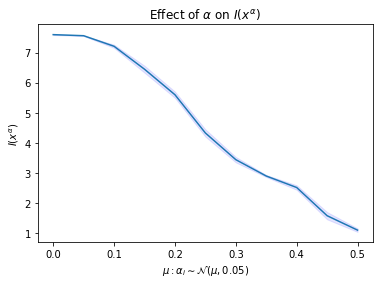

In [10]:
print(alphas)
y = [np.mean(x) for x in alpha_trial_dict_inequality.values()]
print(y)

#some confidence interval
ci = [1.96 * np.std(why)/np.sqrt(len(why)) for why in alpha_trial_dict_inequality.values()]
print(ci)


plt.plot(alphas, y)
plt.fill_between(alphas, ([y[i] - ci[i] for i in range(len(y))]), ([y[i] + ci[i] for i in range(len(y))]), color='b', alpha=.1)
plt.title('Effect of $\\alpha$ on $I(x^\\alpha)$')
plt.xlabel('$\\mu : \\alpha_i \\sim \\mathcal{N}(\\mu, 0.05)$')
plt.ylabel('$I(x^\\alpha)$')
plt.show()

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
[0.0010467366976454943, 0.0033099854232811927, 0.038576619116639864, 0.14222634804514217, 0.29056536447105186, 0.5701611809923801, 0.8118891433657829, 0.9839962907488383, 1.1318249107919223, 1.5382751425894157, 1.7643478124074776]
[0.0006676453992358977, 0.001501897099931893, 0.006923510789957462, 0.016962965487199586, 0.018066701541699596, 0.03177259842493377, 0.026736068028973936, 0.011514361657845808, 0.03125411058011102, 0.05451011907742351, 0.027801438262584317]


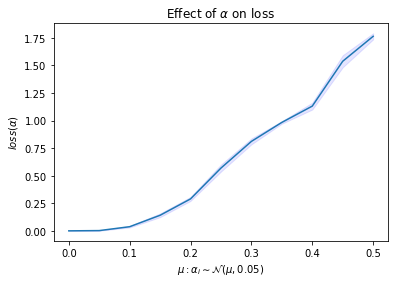

In [11]:
print(alphas)
#print(alpha_trial_dict_allocu)
losses = {alpha: [inequality.loss(player_dict, alpha_trial_dict_allocu[alpha][i], alpha_trial_dict_allocv[alpha][i]) for i in range(len(alpha_trial_dict_allocv[alpha]))] for alpha in alphas}
y = [np.mean(x) for x in losses.values()]
print(y)

#some confidence interval
ci = [1.96 * np.std(why)/np.sqrt(len(why)) for why in losses.values()]
print(ci)


plt.plot(alphas, y)
plt.fill_between(alphas, ([y[i] - ci[i] for i in range(len(y))]), ([y[i] + ci[i] for i in range(len(y))]), color='b', alpha=.1)
plt.title('Effect of $\\alpha$ on loss')
plt.xlabel('$\\mu : \\alpha_i \\sim \\mathcal{N}(\\mu, 0.05)$')
plt.ylabel('$loss(\\alpha)$')
plt.show()

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
[[0.0012685490676567213, 0.000509706060569215, 0.0024702811795531687, 0.0018617231978357296, 0.002819360650809344, 0.0017048134580033292, 0.0011675190505897604, 0.001862867576173599, 0.0017232267976279303, 0.0018794164820388204], [0.005329806318366437, 0.003848292453604074, 0.008047001671103615, 0.005017290763188242, 0.005117761232604323, 0.007505118228133156, 0.00849852090589387, 0.00451160364623604, 0.010445063523185638, 0.003956393589616525], [0.022773749597503112, 0.017993870201225448, 0.01933691768037704, 0.016003316757851493, 0.011335890282639483, 0.016489286777400025, 0.01999677498982244, 0.009723955725121414, 0.023537894982448293, 0.016312945892209996], [0.04444538173013157, 0.05411503727590983, 0.07882940844974762, 0.05770441773776014, 0.04299781596588481, 0.05432478440074995, 0.08313112298603365, 0.04617729293533124, 0.05852337749754888, 0.0589445510786657], [0.1359619773349916, 0.11131297095521653, 0.12395099472119853,

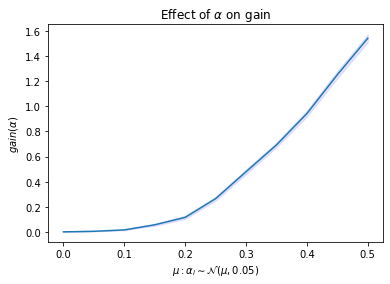

In [12]:
print(alphas)
#print(alpha_trial_dict_allocu)
gains = {alpha: [inequality.gain(player_dict, alpha_trial_dict_allocu[alpha][i], alpha_trial_dict_allocv[alpha][i], alpha_trial_dict_alphas[alpha][i]) for i in range(len(alpha_trial_dict_allocv[alpha]))] for alpha in alphas}
print([x for x in gains.values()])
y = [np.mean(x) for x in gains.values()]
print(y)

#confidence interval
ci = [1.96 * np.std(why)/np.sqrt(len(why)) for why in gains.values()]


plt.plot(alphas, y)
plt.fill_between(alphas, ([y[i] - ci[i] for i in range(len(y))]), ([y[i] + ci[i] for i in range(len(y))]), color='b', alpha=.1)
plt.title('Effect of $\\alpha$ on gain')
plt.xlabel('$\\mu : \\alpha_i \\sim \\mathcal{N}(\\mu, 0.05)$')
plt.ylabel('$gain(\\alpha)$')
plt.show()

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
[5.151310130599823, 2.5226356710229214, 0.46523890683736074, 0.41087949409821994, 0.4007021176913816, 0.46725533299237954, 0.591084101209808, 0.704342705941739, 0.8334275780894007, 0.8152447690457804, 0.8738768369914693]
[3.3669260812133586, 0.7136056923098163, 0.0725849110337678, 0.04042968697859785, 0.02677510393657965, 0.024274895420637935, 0.014485753378029403, 0.012912488282639266, 0.01630164005642993, 0.02403759135659837, 0.01608234480548886]


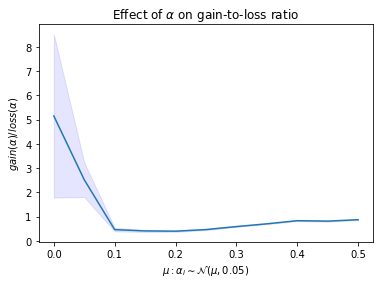

In [17]:
print(alphas)
#print(alpha_trial_dict_allocu)
losses = {alpha: [inequality.loss(player_dict, alpha_trial_dict_allocu[alpha][i], alpha_trial_dict_allocv[alpha][i]) for i in range(len(alpha_trial_dict_allocv[alpha]))] for alpha in alphas}
gains = {alpha: [inequality.gain(player_dict, alpha_trial_dict_allocu[alpha][i], alpha_trial_dict_allocv[alpha][i], alpha_trial_dict_alphas[alpha][i]) for i in range(len(alpha_trial_dict_allocv[alpha]))] for alpha in alphas}
plotter = [[gains[x][i] / losses[x][i] for i in range(len(gains[x]))] for x in losses.keys()]

y = [np.mean(val) for val in plotter]
print(y)

#confidence interval
ci = [1.96 * np.std(why)/np.sqrt(len(why)) for why in plotter]
print(ci)

plt.plot(alphas, y)
plt.fill_between(alphas, ([y[i] - ci[i] for i in range(len(y))]), ([y[i] + ci[i] for i in range(len(y))]), color='b', alpha=.1)
plt.title('Effect of $\\alpha$ on gain-to-loss ratio')
plt.xlabel('$\\mu : \\alpha_i \\sim \\mathcal{N}(\\mu, 0.05)$')
plt.ylabel('$gain(\\alpha) / loss(\\alpha)$')
plt.show()

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
{0.0: 0.6323693785709232, 0.05: 0.942045300946545, 0.1: 1.4590877584186597, 0.15000000000000002: 2.3021597337964144, 0.2: 3.016810598611539, 0.25: 3.9757791985386093, 0.30000000000000004: 4.315229593769898, 0.35000000000000003: 4.636871137815899, 0.4: 4.814214392791183, 0.45: 5.2342110595900655, 0.5: 5.483488546854754}
[0.6323693785709232, 0.942045300946545, 1.4590877584186597, 2.3021597337964144, 3.016810598611539, 3.9757791985386093, 4.315229593769898, 4.636871137815899, 4.814214392791183, 5.2342110595900655, 5.483488546854754]
[0.13603370347861773, 0.14272065509600246, 0.10737381453529413, 0.13873578035833142, 0.13256325279441336, 0.06882040691392849, 0.05716432330828476, 0.023263574343499988, 0.04313210084054759, 0.04477218547867619, 0.01645619360945771]


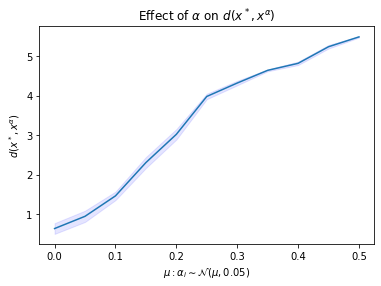

In [23]:
from itertools import chain
from math import dist
print(alphas)
#print(list(chain(*alpha_trial_dict_allocu[0][0])))
distances = {alpha: [dist(list(chain(*alpha_trial_dict_allocu[alpha][i])), list(chain(*alpha_trial_dict_allocv[alpha][i]))) for i in range(num_trials)] for alpha in alphas}
print({alpha: np.mean(val) for alpha, val in distances.items()})

y = [np.mean(val) for val in distances.values()]
print(y)

#some confidence interval
ci = [1.96 * np.std(why)/np.sqrt(len(why)) for why in distances.values()]
print(ci)


plt.plot(alphas, y)
plt.fill_between(alphas, ([y[i] - ci[i] for i in range(len(y))]), ([y[i] + ci[i] for i in range(len(y))]), color='b', alpha=.1)
plt.title('Effect of $\\alpha$ on $d(x^*, x^\\alpha)$')
plt.xlabel('$\\mu : \\alpha_i \\sim \\mathcal{N}(\\mu, 0.05)$')
plt.ylabel('$d(x^*, x^\\alpha)$')
plt.show()